In [1]:
from PHANGS_Ha_collection import *

import warnings
warnings.filterwarnings("ignore")

/Users/abarnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define galaxy lists
wfi_galaxies = ['NGC1087', 'NGC1672', 'NGC2835', 'NGC3627', 'NGC4535', 'IC5332', 'NGC4254', 'NGC5068', 
                'NGC0628', 'NGC1512', 'NGC1300', 'NGC1365', 'NGC1385', 'NGC1433', 'NGC1566', 'NGC4303', 
                'NGC4321', 'NGC6744', 'NGC3511', 'NGC3596', 'NGC4293', 'NGC4298', 'NGC4496A', 'NGC4569', 
                'NGC4571', 'NGC4654', 'NGC4731', 'NGC2997', 'NGC3351', 'NGC4540', 'NGC4548', 'NGC4689']

ccd_galaxies = [
    "NGC7496", "NGC7456", "NGC6300", "NGC5643", "NGC5530", "NGC5248", "NGC5134", 
    "NGC5042", "NGC4951", "NGC4941", "NGC4781", "NGC4694", "NGC4689", "NGC4548", 
    "NGC4540", "NGC4457", "NGC4424", "NGC4207", "NGC3626", "NGC3507", "NGC3059", 
    "NGC2775", "NGC2566", "NGC2283", "NGC2090", "NGC1809", "NGC1792", "NGC1559", 
    "NGC1546", "NGC1511", "NGC1326", "NGC1317", "NGC0685", "IC5273", "IC1993", "IC1954"
]

# ccd_galaxies = ['NGC0685', 'NGC1317', 'NGC1326', 'IC1954', 'IC1993', 'NGC1511', 'NGC1546', 'NGC1559',
#                 'NGC1809', 'NGC1792', 'NGC2090', 'NGC2283', 'NGC2566', 'NGC2775', 'NGC3059', 'NGC3507',
#                 'NGC3626', 'NGC4207', 'NGC4424', 'NGC4457', 'NGC4540', 'NGC4548', 'NGC4689', 'NGC4694']

wfi_galaxies = np.sort(wfi_galaxies)
ccd_galaxies = np.sort(ccd_galaxies)

path_to_Ha_wfi = './data/HaSUB_wcomb_corr_wfi/'
path_to_Ha_ccd = './data/HaSUB_wcomb_corr_ccd/'
path_to_Ha_all = [path_to_Ha_wfi, path_to_Ha_ccd]

pixel_scales = [0.238, 0.259]
grid_idxs = [0, 1]
titles = ['MPG2.2m/WFI galaxies', 'duPont/DirectCCD galaxies']
list_of_gals_all = [wfi_galaxies, ccd_galaxies]

In [3]:
ha_wifi_dict = {}
ha_ccd_dict = {}

In [4]:
for i in [0,1]:

    list_of_gals = list_of_gals_all[i]
    grid_idx = grid_idxs[i]
    title = titles[i]
    path_to_Ha = path_to_Ha_all[i]
    pixel_scale = pixel_scales[i]
    
    for j, gal in enumerate(list_of_gals):

        print('Processing:', gal)

        ha_sub = PHANGSHa(Path(path_to_Ha), gal)
        ha_sub.set_fits_prop(ha_sub.path.joinpath(f'{gal}_Hasub_flux_corrs.fits'))
        ha_sub.set_gal_prop(pixel_scale)
        ha_sub.trim_data()
        # ha_sub.scale_data()

        if i == 0:
            ha_wifi_dict[gal] = ha_sub
        else:
            ha_ccd_dict[gal] = ha_sub

Processing: IC5332
Processing: NGC0628
Processing: NGC1087
Processing: NGC1300
Processing: NGC1365
Processing: NGC1385
Processing: NGC1433
Processing: NGC1512
Processing: NGC1566
Processing: NGC1672
Processing: NGC2835
Processing: NGC2997
Processing: NGC3351
Processing: NGC3511
Processing: NGC3596
Processing: NGC3627
Processing: NGC4254
Processing: NGC4293
Processing: NGC4298
Processing: NGC4303
Processing: NGC4321
Processing: NGC4496A
Processing: NGC4535
Processing: NGC4540
Processing: NGC4548
Processing: NGC4569
Processing: NGC4571
Processing: NGC4654
Processing: NGC4689
Processing: NGC4731
Processing: NGC5068
Processing: NGC6744
Processing: IC1954
Processing: IC1993
Processing: IC5273
Processing: NGC0685
Processing: NGC1317
Processing: NGC1326
Processing: NGC1511
Processing: NGC1546
Processing: NGC1559
Processing: NGC1792
Processing: NGC1809
Processing: NGC2090
Processing: NGC2283
Processing: NGC2566
Processing: NGC2775
Processing: NGC3059
Processing: NGC3507
Processing: NGC3626
Pro

In [5]:
import matplotlib as mpl 
import colorcet

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"

In [6]:
# Deinfe colours
cmap1 = plt.cm.binary(np.linspace(0, 1, 256))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 256))
cmaplist = np.vstack((cmap1, cmap2))
cmap_map = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap_map.set_under(cmap_map(0))
cmap_map.set_bad(color=cmap_map(0))

In [7]:
from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans

In [ ]:
i = 0

fig = plt.figure(figsize=(10, 10))
fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(wspace=0.01, hspace=0.015)

num_cols = 6  # Number of columns
num_rows = -(-len(list_of_gals_all[i]) // num_cols)  # Compute rows needed

for j, gal in enumerate(list_of_gals_all[i]):

    print('Processing:', gal)

    row = j // num_cols
    col = j % num_cols
            
    ax = fig.add_subplot(num_rows, num_cols, j + 1)

    # Use astropy to interpolate of nans 
    image = ha_wifi_dict[gal].data

    kernel = Gaussian2DKernel(x_stddev=3)
    reconstructed_image = interpolate_replace_nans(image, kernel)

    # image = np.arcsinh(reconstructed_image)
    image = np.arctan(reconstructed_image)

    p = np.nanpercentile(image, [0.1, 99.9])
    vmin = p[0]
    vmax = p[1]
    im1 = ax.imshow(image, cmap=cmap_map, origin='lower', vmin=vmin, vmax=vmax)

    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.05, 0.94, gal, transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=0.9), size=8, ha='left', va='top')

    # Add a title for whole figure in bold text
    if j == 0:
        ax.set_title(title, fontsize=12, fontweight='bold')


fig.savefig('./figures/HaSUB_wcomb_corr_wfi.png', dpi=300, bbox_inches='tight')

Processing: IC5332
Processing: NGC0628
Processing: NGC1087
Processing: NGC1300
Processing: NGC1365
Processing: NGC1385
Processing: NGC1433
Processing: NGC1512
Processing: NGC1566
Processing: NGC1672
Processing: NGC2835
Processing: NGC2997
Processing: NGC3351
Processing: NGC3511
Processing: NGC3596
Processing: NGC3627
Processing: NGC4254
Processing: NGC4293
Processing: NGC4298
Processing: NGC4303
Processing: NGC4321
Processing: NGC4496A
Processing: NGC4535
Processing: NGC4540
Processing: NGC4548
Processing: NGC4569
Processing: NGC4571
Processing: NGC4654
Processing: NGC4689
Processing: NGC4731
Processing: NGC5068
Processing: NGC6744


<Figure size 1000x1000 with 0 Axes>

In [ ]:
i = 0

fig = plt.figure(figsize=(10, 10))
fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(wspace=0.01, hspace=0.015)

num_cols = 6  # Number of columns
num_rows = -(-len(list_of_gals_all[i]) // num_cols)  # Compute rows needed

for j, gal in enumerate(list_of_gals_all[i]):

    print('Processing:', gal)

    row = j // num_cols
    col = j % num_cols
            
    ax = fig.add_subplot(num_rows, num_cols, j + 1)

    # Use astropy to interpolate of nans 
    image = ha_wifi_dict[gal].data_trim

    kernel = Gaussian2DKernel(x_stddev=3)
    reconstructed_image = interpolate_replace_nans(image, kernel)

    # image = np.arcsinh(reconstructed_image)
    image = np.arctan(reconstructed_image)

    p = np.nanpercentile(image, [0.1, 99.9])
    vmin = p[0]
    vmax = p[1]
    im1 = ax.imshow(image, cmap=cmap_map, origin='lower', vmin=vmin, vmax=vmax)

    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.05, 0.94, gal, transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=0.9), size=8, ha='left', va='top')

    # Add a title for whole figure in bold text
    if j == 0:
        ax.set_title(title, fontsize=12, fontweight='bold')


fig.savefig('./figures/HaSUB_wcomb_corr_wfi_trim.png', dpi=300, bbox_inches='tight')

Processing: IC5332
Processing: NGC0628
Processing: NGC1087
Processing: NGC1300
Processing: NGC1365
Processing: NGC1385
Processing: NGC1433
Processing: NGC1512
Processing: NGC1566
Processing: NGC1672
Processing: NGC2835
Processing: NGC2997
Processing: NGC3351
Processing: NGC3511
Processing: NGC3596
Processing: NGC3627
Processing: NGC4254
Processing: NGC4293
Processing: NGC4298
Processing: NGC4303
Processing: NGC4321
Processing: NGC4496A
Processing: NGC4535
Processing: NGC4540
Processing: NGC4548
Processing: NGC4569
Processing: NGC4571
Processing: NGC4654
Processing: NGC4689
Processing: NGC4731
Processing: NGC5068
Processing: NGC6744


<Figure size 1000x1000 with 0 Axes>

Processing: IC1954
Processing: IC1993
Processing: IC5273
Processing: NGC0685
Processing: NGC1317
Processing: NGC1326
Processing: NGC1511
Processing: NGC1546
Processing: NGC1559
Processing: NGC1792
Processing: NGC1809
Processing: NGC2090
Processing: NGC2283
Processing: NGC2566
Processing: NGC2775
Processing: NGC3059
Processing: NGC3507
Processing: NGC3626
Processing: NGC4207
Processing: NGC4424
Processing: NGC4457
Processing: NGC4540
Processing: NGC4548
Processing: NGC4689
Processing: NGC4694
Processing: NGC4781
Processing: NGC4941
Processing: NGC4951
Processing: NGC5042
Processing: NGC5134
Processing: NGC5248
Processing: NGC5530
Processing: NGC5643
Processing: NGC6300
Processing: NGC7456
Processing: NGC7496


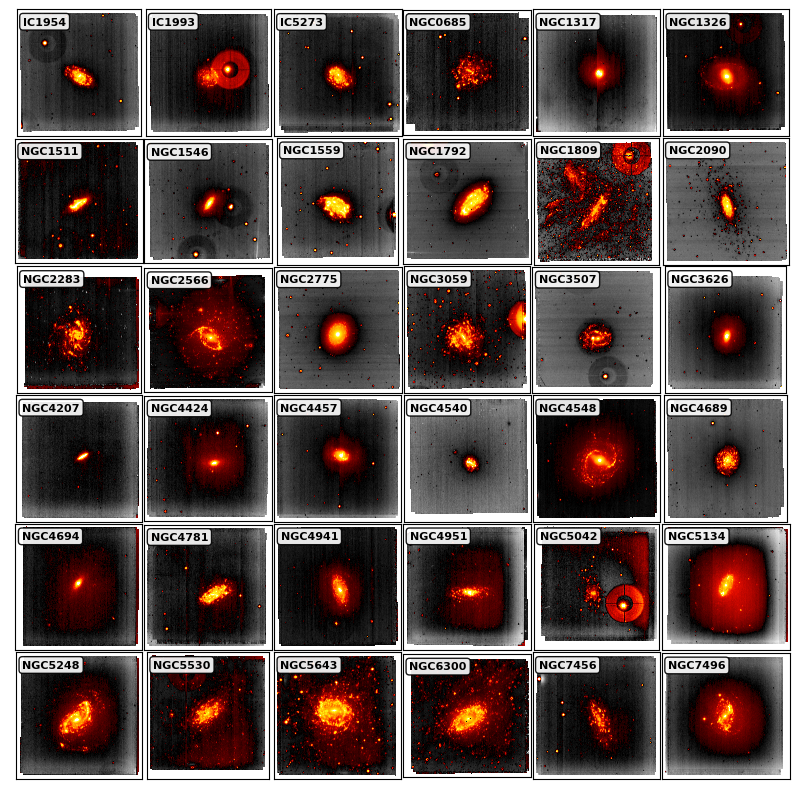

In [10]:
i = 1

fig = plt.figure(figsize=(10, 10))
fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(wspace=0.01, hspace=0.015)

num_cols = 6  # Number of columns
num_rows = -(-len(list_of_gals_all[i]) // num_cols)  # Compute rows needed

for j, gal in enumerate(list_of_gals_all[i]):

    print('Processing:', gal)

    row = j // num_cols
    col = j % num_cols
            
    # ax = fig.add_subplot(row, col, i+1)
    ax = fig.add_subplot(num_rows, num_cols, j + 1)

    # Use astropy to interpolate of nans 
    image = ha_ccd_dict[gal].data

    kernel = Gaussian2DKernel(x_stddev=3)
    reconstructed_image = interpolate_replace_nans(image, kernel)

    # image = np.arcsinh(reconstructed_image)
    image = np.arctan(reconstructed_image)

    p = np.nanpercentile(image, [0.1, 99.9])
    vmin = p[0]
    vmax = p[1]
    im1 = ax.imshow(image, cmap=cmap_map, origin='lower', vmin=vmin, vmax=vmax)

    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.05, 0.94, gal, transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=0.9), size=8, ha='left', va='top')

fig.savefig('./figures/HaSUB_wcomb_corr_ccd.png', dpi=300, bbox_inches='tight')

Processing: IC1954
Processing: IC1993
Processing: IC5273
Processing: NGC0685
Processing: NGC1317
Processing: NGC1326
Processing: NGC1511
Processing: NGC1546
Processing: NGC1559
Processing: NGC1792
Processing: NGC1809
Processing: NGC2090
Processing: NGC2283
Processing: NGC2566
Processing: NGC2775
Processing: NGC3059
Processing: NGC3507
Processing: NGC3626
Processing: NGC4207
Processing: NGC4424
Processing: NGC4457
Processing: NGC4540
Processing: NGC4548
Processing: NGC4689
Processing: NGC4694
Processing: NGC4781
Processing: NGC4941
Processing: NGC4951
Processing: NGC5042
Processing: NGC5134
Processing: NGC5248
Processing: NGC5530
Processing: NGC5643
Processing: NGC6300
Processing: NGC7456
Processing: NGC7496


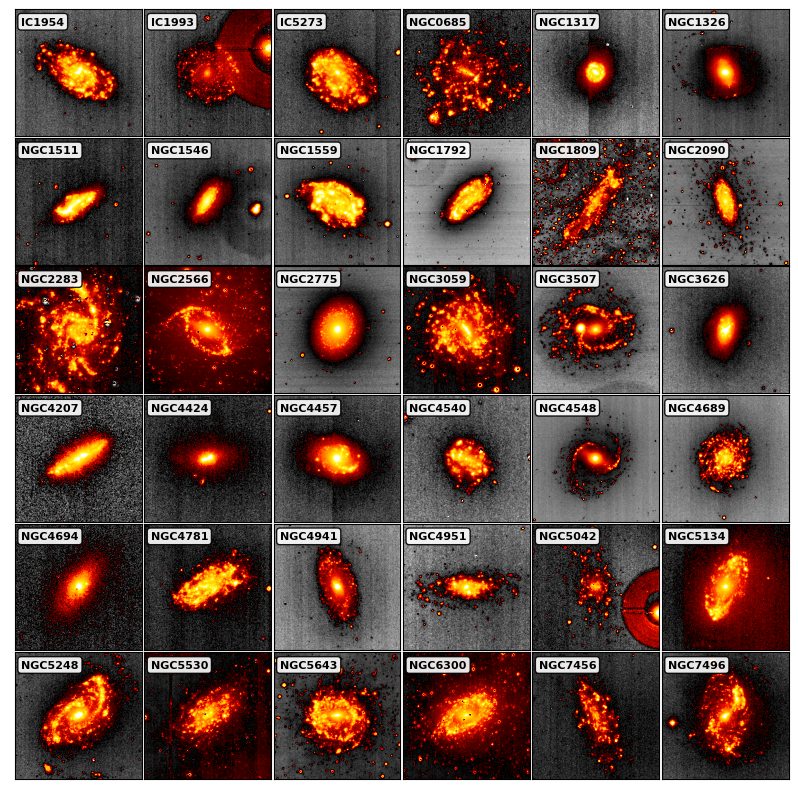

In [11]:
i = 1

fig = plt.figure(figsize=(10, 10))
fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(wspace=0.01, hspace=0.015)

num_cols = 6  # Number of columns
num_rows = -(-len(list_of_gals_all[i]) // num_cols)  # Compute rows needed

for j, gal in enumerate(list_of_gals_all[i]):

    print('Processing:', gal)

    row = j // num_cols
    col = j % num_cols
            
    # ax = fig.add_subplot(row, col, i+1)
    ax = fig.add_subplot(num_rows, num_cols, j + 1)

    # Use astropy to interpolate of nans 
    image = ha_ccd_dict[gal].data_trim

    kernel = Gaussian2DKernel(x_stddev=3)
    reconstructed_image = interpolate_replace_nans(image, kernel)

    # image = np.arcsinh(reconstructed_image)
    image = np.arctan(reconstructed_image)

    p = np.nanpercentile(image, [0.1, 99.9])
    vmin = p[0]
    vmax = p[1]
    im1 = ax.imshow(image, cmap=cmap_map, origin='lower', vmin=vmin, vmax=vmax)

    ax.set_xticklabels([])
    ax.set_yticklabels([])

    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.05, 0.94, gal, transform=ax.transAxes, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=0.9), size=8, ha='left', va='top')

fig.savefig('./figures/HaSUB_wcomb_corr_ccd_trim.png', dpi=300, bbox_inches='tight')